## K - Nearest Neighbors (KNN Algoritması)


* Bir sınıflandırma algoritmasıdır.
* Daha önce elde edilen noktalara bakarak yeni bir nokta geldiği zaman onun hangi grupta olduğunu bulmak için kullanılır.
* En yakındaki K tane komşu nokta bulunur.
* En çok hangi gruptan komşu nokta varsa yeni gelen noktanın o gruptan olduğu kabul edilir.

* Yapay Zeka algoritması (KNN modeli) yeni noktanın hangi grupta olduğunu bulurken Euclidean distance (Öklid mesafesi) hesaplamasını kullanır. Yani Pisagor.

* Kaggle'da 768 Hintli kadın hastanın kaydı bulunan gerçek tıp veri setini direkt kullanacağız.

### Amaç

Veri setimizi iki kısma ayıracağız.

* 1.kısmı eğitmek için
* 2.kısmı test etmek için kullanacağız.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Outcome = 1 Diabet / Şeker Hastası
# Outcome = 0 Sağlıklı

df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


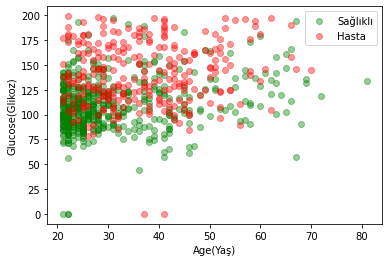

In [2]:
saglikli = df[df.Outcome == 0]
hasta = df[df.Outcome == 1]

# Şimdilik yalnızca glikoza seviyesine göre bir grafik çizeceğiz. 
# Program sonunda yapay zeka tüm verilere göre bir tahmin yapacak.

plt.scatter(saglikli.Age, saglikli.Glucose, color = "green", label = "Sağlıklı", alpha = 0.4) #alpha : saydamlık
plt.scatter(hasta.Age, hasta.Glucose, color = "red", label = "Hasta", alpha = 0.4)
plt.xlabel("Age(Yaş)")
plt.ylabel("Glucose(Glikoz)")
plt.legend();

In [3]:
# x ve y eksenlerini belirleyelim.
y = df.Outcome.values
x_ham_veri = df.drop(["Outcome"], axis = 1)

# Outcome sütununu (dependent variable) çıkarıp sadece independent verileri bırakıyoruz.
# Çünkü KNN algoritması x değerleri içinde gruplandırma yapacak.

# normalization yapıyoruz - x_ham_veri içerisindeki değerleri sadece 0 ve 1 arasında olacak şekilde hepsini güncelliyoruz.
# Eğer bu şekilde normalization yapmazsak yüksek rakamlar küçük rakamları ezer ve algoritmayı yanıltabilir.
x = (x_ham_veri - np.min(x_ham_veri))/(np.max(x_ham_veri) - np.min(x_ham_veri))

C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [4]:
# önce
print("Normalization öncesi ham veriler: \n")
print(x_ham_veri.head())

# sonra
print("\n\n\n Normalization sonrası yapay zekayı eğitmek için kullanacağımız veriler:\n")
print(x.head())

Normalization öncesi ham veriler: 

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  



 Normalization sonrası yapay zekayı eğitmek için kullanacağımız veriler:

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.47

* train datamız ile test datamızı ayırıyoruz.
* train datamız sistemin sağlıklı insan ile hasta insanı ayırt etmesini öğrenmek için kullanılacak.
* test datamız ise makine öğrenme modelimizin hasta ile sağlıklı insanı doğru ayırt edip etmediğini test edecek.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)
# test_size'ı değiştirerek doğruluk oranlarını değiştirebiliriz.

KNN modelimizi oluşturuyoruz.

In [6]:
knn = KNeighborsClassifier(n_neighbors = 3) #n_neighbors = k
knn.fit(x_train, y_train) #fit yani eğit.
prediction = knn.predict(x_test) #predict : tahmin et
print("K=3 için test verilerimizin doğrulama test sonucu ", knn.score(x_test, y_test))

K=3 için test verilerimizin doğrulama test sonucu  0.7857142857142857


k kaç olmalı? en iyi k değerini belirleyelim.

In [7]:
sayac = 1
for k in range(1,11):
    knn_yeni = KNeighborsClassifier(n_neighbors = k)
    knn_yeni.fit(x_train, y_train)
    prediction = knn_yeni.predict(x_test)
    print(sayac, "  ", "Doğruluk oranı : %", knn_yeni.score(x_test,y_test)*100)
    sayac += 1

1    Doğruluk oranı : % 69.48051948051948
2    Doğruluk oranı : % 74.02597402597402
3    Doğruluk oranı : % 78.57142857142857
4    Doğruluk oranı : % 75.97402597402598
5    Doğruluk oranı : % 79.87012987012987
6    Doğruluk oranı : % 79.22077922077922
7    Doğruluk oranı : % 81.16883116883116
8    Doğruluk oranı : % 79.22077922077922
9    Doğruluk oranı : % 78.57142857142857
10    Doğruluk oranı : % 79.22077922077922


In [8]:
# Yeni bir hasta tahmini için:
from sklearn.preprocessing import MinMaxScaler
 
# normalization yapıyoruz - daha hızlı normalization yapabilmek için MinMax  scaler kullandık...
sc = MinMaxScaler()
sc.fit_transform(x_ham_veri)
 
new_prediction = knn.predict(sc.transform(np.array([[6,148,72,35,0,33.6,0.627,50]])))
new_prediction[0]

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


1

Sonuç 1 çıktı yani hasta. Verileri değiştirerek farklı sonuçlar elde edebiliriz.